In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

import numpy as np

df = pd.read_csv("data/us_change.csv", index_col=0)

Objetivo: Modelar Consumption a partir das outras covariáveis

In [2]:
df

,Quarter,Consumption,Income,Production,Savings,Unemployment
1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...,...
194,2018 Q2,0.983112,0.661825,1.117424,-2.723974,0.0
195,2018 Q3,0.853181,0.806271,1.256722,-0.085686,-0.3
196,2018 Q4,0.356512,0.695142,0.948148,5.031337,0.2
197,2019 Q1,0.282885,1.100753,-0.488206,9.760287,-0.1


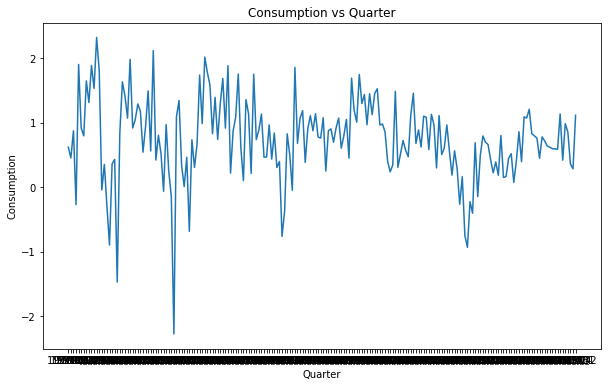

In [3]:

import numpy as np

# Convert DataFrame columns to numpy arrays
quarters = np.array(df['Quarter'])
consumption = np.array(df['Consumption'])

# Increase plot size
plt.figure(figsize=(10, 6))

# Plot Consumption vs Quarter
plt.plot(quarters, consumption)
plt.title('Consumption vs Quarter')
plt.xlabel('Quarter')
plt.ylabel('Consumption')
plt.show()


### Métricas e métodos de avaliação

Utilizaremos o Erro Absoluto Médio (MAE) para avaliação, pela facilidade de interpretação. Também utilizaremos Raiz do Erro Quadrático Médio (RMSE) para conferirmos se há valores que distoam muito das previsões; O valor real $y_t$ se aproxima de $0$, portanto MAPE não é uma escolha ideal. Por isso, utilizaremos MASE para erros percentuais.


### Necessidade de transformação de variáveis



In [4]:
df.describe()

,Consumption,Income,Production,Savings,Unemployment
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.742482,0.728169,0.507083,1.392258,0.001010
std,0.637863,0.900393,1.521350,11.966324,0.367318
min,-2.277836,-4.084420,-6.836039,-56.471910,-0.900000
25%,0.417479,0.314376,-0.010780,-4.049088,-0.200000
50%,0.776656,0.760346,0.666085,1.349359,-0.100000
75%,1.097577,1.160228,1.295245,6.341144,0.100000
max,2.319558,4.521869,4.154295,41.607730,1.400000


Savings possui uma amplitude mais alta, com valores que variam de aproximadamente $-57$ e $41$. Isso sugere que alguma transformação logaritmica para adequar as escalas possa ser interessante em alguns modelos.
Além disso, utilizar uma normalização Z-Score para Comsumption, Income, Production e Unemployment pode agregar dependendo de qual modelo testaremos, principalmente nos mais sensíveis a escalas.

### Necessidade de decomposição entre tendência e sazonalidade

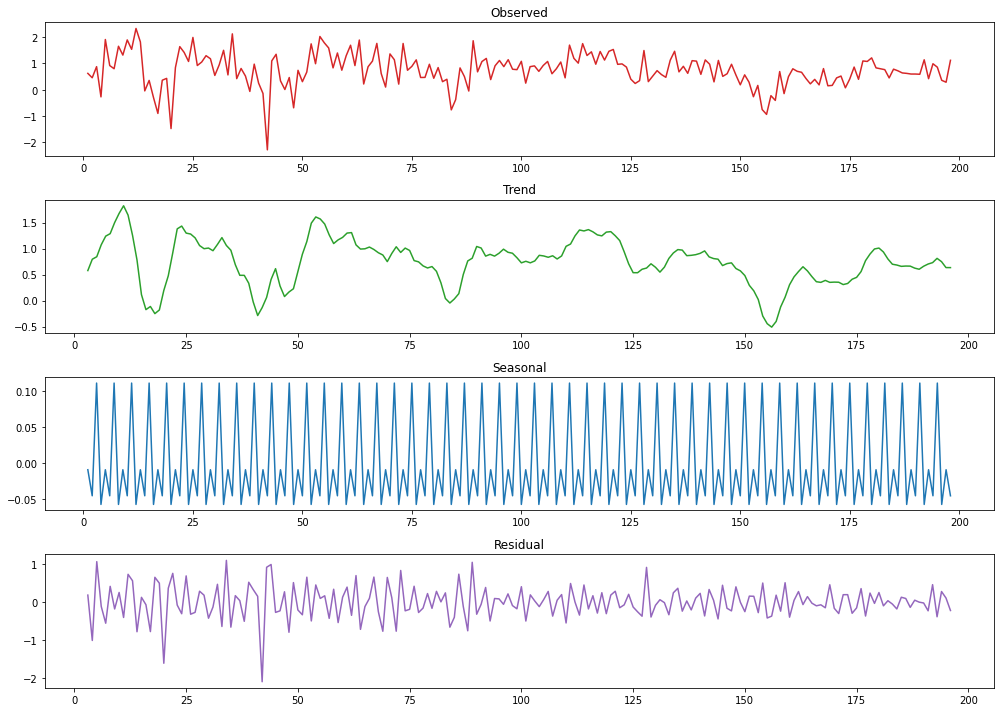

In [5]:
# Escolha uma série para decomposição, por exemplo, 'Consumption'
series = df['Consumption']

result = seasonal_decompose(series, model='additive', period=4)

# Plotando os componentes de decomposição com tamanho maior
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
result.observed.plot(ax=ax1, color='tab:red', title='Observed')
result.trend.plot(ax=ax2, color='tab:green', title='Trend')
result.seasonal.plot(ax=ax3, color='tab:blue', title='Seasonal')
result.resid.plot(ax=ax4, color='tab:purple', title='Residual')

# Ajustando o layout para melhor visualização
plt.tight_layout()
plt.show()

A série temporal parece ter uma sazonalidade bem definida e tendência variável.

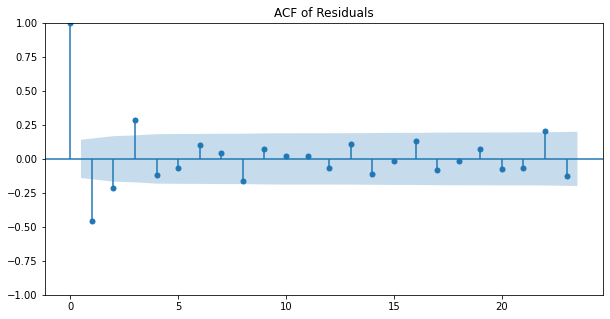

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(result.resid.dropna(), ax=plt.gca(), title="ACF of Residuals")
plt.show()

Os resíduos parecem ter correlação em alguns lags, principalmente no lag 1. Isso indica que pode haver alguma estrutura temporal remanescente nos resíduos.